In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

Defining keyboard coordinates and keys

In [9]:
def plot_keyboard(keys):
    fig,ax= plt.subplots(figsize=(13,5))
    ax.scatter(coords[1],1-coords[0],color='black',marker='s',lw=50)
    ax.scatter(coords[1],1-coords[0],color='white',marker='s',lw=40)
    for n,i in enumerate(keys):
        ax.text(coords[1][n],1-coords[0][n],i.upper(),fontsize=30,verticalalignment='center',horizontalalignment='center')
    ax.set_xlim(-1,10)
    ax.set_ylim(-2,2)
    plt.axis('off')
    plt.show()

In [10]:
keys_coords = {}
keys_coords[0] = {i:np.array([0,i]) for i in range(10)}
keys_coords[1] = {i:np.array([1,i+0.25]) for i in range(10)}
keys_coords[2] = {i:np.array([2,i+0.75]) for i in range(9)}
coords = np.array(sum([list(i.values()) for i in list(keys_coords.values())],[])).T
qwerty_keys = [i for i in 'qwertyuiopasdfghjklçzxcvbnm,.']

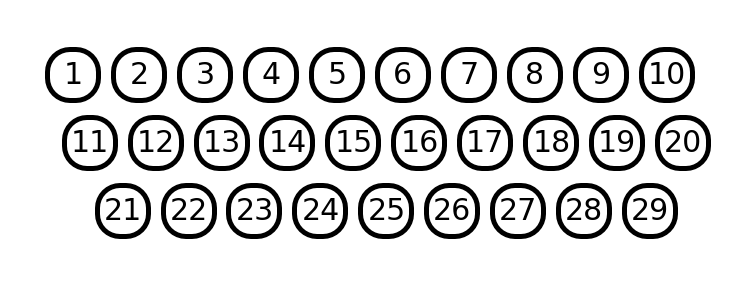

In [11]:
plot_keyboard([str(i) for i in range(1,len(qwerty_keys)+1)])

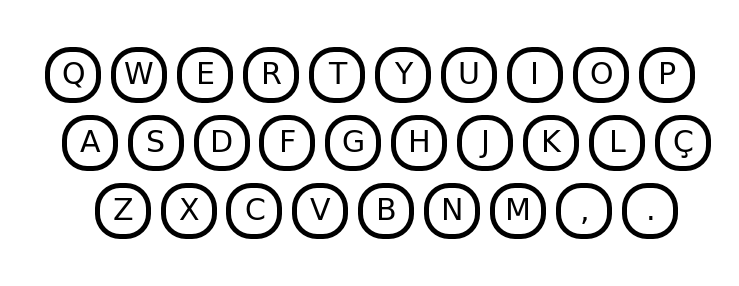

In [12]:
plot_keyboard(qwerty_keys)

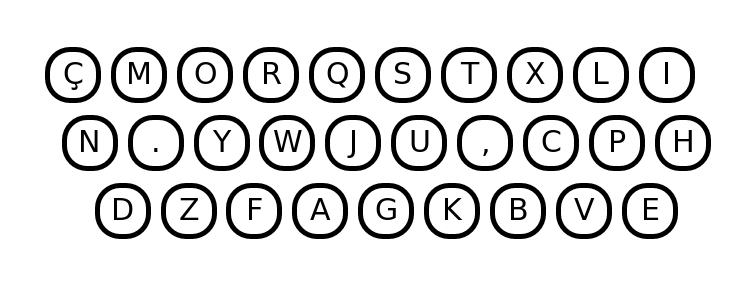

In [13]:
plot_keyboard(random.sample(qwerty_keys, len(qwerty_keys)))

---

In [14]:
df = pd.read_csv('../data/b2w.csv')

text = ' '.join(df['review_text_processed'].tolist())

text = [i for i in text if i in 'qwertyuiopasdfghjklçzxcvbnm,.']

text = ''.join(text)

text = list(zip(text, text[1:]))

text = pd.Series(text)

text = text.value_counts()

# text = text.to_dict()

In [15]:
b = random.sample(qwerty_keys, len(qwerty_keys))

In [16]:
def get_points(keyboard):
    conversion = pd.Series(dict(zip(keyboard, coords.T)))
    a = pd.DataFrame(np.array([list(i) for i in text.index.tolist()]))
    return (text.values * (a[0].apply(lambda i: conversion[i]) -
                           a[1].apply(lambda i: conversion[i])).apply(
                               np.linalg.norm).values).sum()

In [24]:
get_points([''.join(random.sample(qwerty_keys, len(qwerty_keys))) for i in range(100)][0])

56539750.491980985

In [27]:
a = pd.Series([''.join(random.sample(qwerty_keys, len(qwerty_keys))) for i in range(100)])

In [34]:
a.iloc[a.apply(get_points).sort_values().index]

63    nitexsmwlbfdg.a,hçjzcoyrupqvk
12    wukljtoç,hdfzaeqinmyg.pvrsxcb
27    qnybhertjivdk.uam,zçlxpwosgcf
72    g,yahrztuqc.vmonlpkiçdbfejxsw
23    fyuosciwbqlkxed,ajzgrnv.tmhçp
                  ...              
91    itobmu.cx,çlqhswzyraengjkvfpd
15    cmwqtçkdausehzylfv.xnbjirg,po
93    ikdhbvjpmcafzugsy,oe.rwlnqxtç
41    oxavçplkymeb,s.wtdrhcjgfinzqu
2     sikqjplatdnmwybvc.xerçguf,zho
Length: 100, dtype: object